In [1]:
from helpers import parse_gpx, identify_features, calculate_abilities, plot_elevation_chart, plot_elevation_chart_with_features
import pandas as pd
import numpy as np

In [2]:
file_path = 'data/TdF-stage-17-route.gpx'
regularized_points, total_distance, points = parse_gpx(file_path, min_distance=500)
features = identify_features(regularized_points)
abilities = calculate_abilities(features, total_distance)


stage_data = {
    'points_raw' : points,
    'points' : regularized_points,
    'features' : features,
    'abilities' : abilities,
    'total_distance' : total_distance,
    'year': 2024,
    'stage': file_path,
}

In [3]:
raw_points = pd.DataFrame( stage_data['points_raw'])

In [4]:
raw_points

,lat,lon,elev,dist
0,44.33024,4.81713,84.0,52.409235
1,44.32975,4.81760,85.0,118.486807
2,44.32959,4.81775,86.0,139.908277
3,44.32925,4.81810,87.0,186.858824
4,44.32908,4.81829,88.0,211.060682
...,...,...,...,...
13112,44.67863,5.92723,1498.0,177985.357841
13113,44.67857,5.92717,1498.0,177993.544230
13114,44.67844,5.92708,1498.0,178009.656160
13115,44.67843,5.92708,1497.0,178010.768109


In [5]:
processed_points = pd.DataFrame(stage_data['points'])

In [6]:
processed_points

,lat,lon,elev,dist,gradient,feature_type
0,44.32864,4.82203,94.0,520.903588,1.919741,
1,44.32509,4.82575,102.0,1026.301637,1.582911,
2,44.32057,4.82552,108.0,1539.830460,1.168386,
3,44.31589,4.82497,104.0,2065.832391,-0.760453,
4,44.31300,4.82956,110.0,2578.019443,1.171447,
...,...,...,...,...,...,...
338,44.68253,5.94266,1380.0,175517.702247,6.558197,
339,44.68049,5.94133,1409.0,176045.347145,5.496121,
340,44.67624,5.93911,1436.0,176551.147890,5.338070,
341,44.67469,5.93459,1462.0,177056.750732,5.142376,


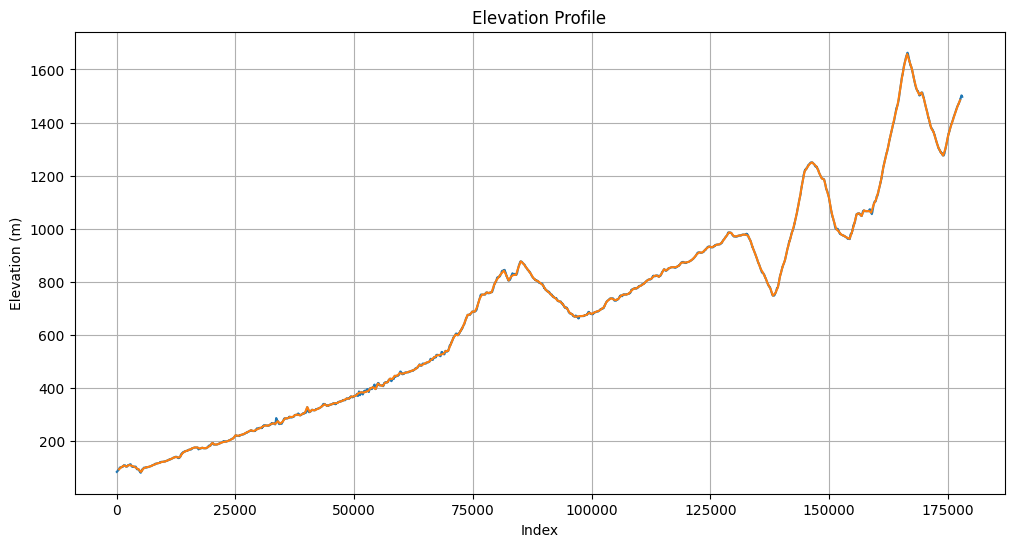

In [7]:
import matplotlib.pyplot as plt


# Plotting the profile
plt.figure(figsize=(12, 6))
plt.plot(raw_points['dist'], raw_points['elev'], label='Initial Data')
plt.plot(processed_points['dist'], processed_points['elev'], label='New Data')
plt.xlabel('Index')
plt.ylabel('Elevation (m)')
plt.title('Elevation Profile')
plt.grid(True)

plt.show()

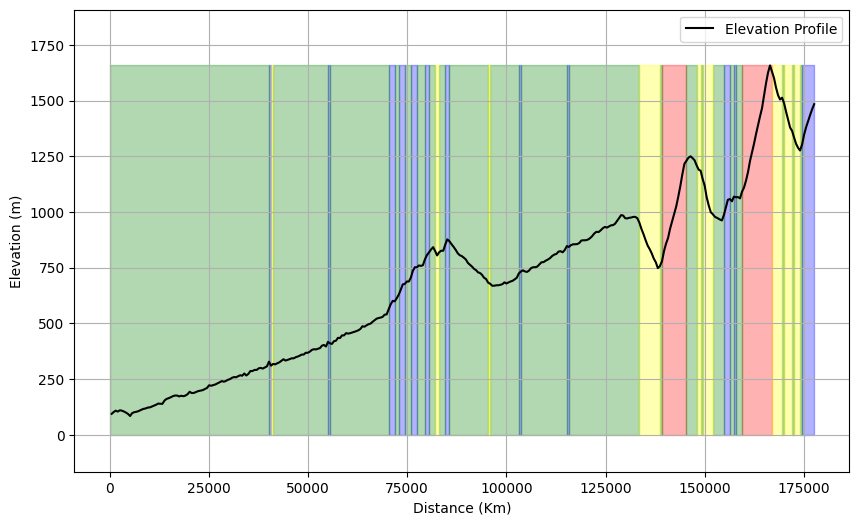

In [18]:
# Convert to DataFrame
stage_df = pd.DataFrame(stage_data['points'])
features_df = pd.DataFrame(stage_data['features'])

# Define color mapping for types
type_colors = {
    'hill': 'blue',
    'climb': 'red',
    'flat': 'green',
    'descent': 'yellow'
}

# Plot the profile chart
plt.figure(figsize=(10, 6))

# Plot elevation profile line
plt.plot(stage_df['dist'], stage_df['elev'], label='Elevation Profile', color='black')

# Plot filled area with colors based on 'type'
for t in type_colors:
    for index, row in features_df[features_df['type'] == t].iterrows():
        plt.fill_betweenx([0, max(stage_df['elev'])], row['start_km'], row['end_km'], color=type_colors[t], alpha=0.3)

# Set the y-axis limits
plt.ylim(stage_df['elev'].min()-250, stage_df['elev'].max()+250)

# Labels and legend
plt.xlabel('Distance (Km)')
plt.ylabel('Elevation (m)')
plt.legend()
plt.grid(True)
plt.show()

In [12]:
stage_data['abilities']

{'Stamina': 13.92,
 'Sprint': 8.58,
 'Climbing': 41.39,
 'Flat': 14.8,
 'Technique': 2.42,
 'Downhill': 4.62,
 'Hills': 5.59,
 'Aggressiveness': 4.04,
 'Teamwork': 4.65}